In [2]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
bar_colors = ['tab:red', 'tab:blue', 'tab:red', 'tab:orange']

In [3]:
# load the train and test dataset
train = pd.read_csv(
    "/Users/gini/MSc_AI/Dissertation_Project/dissertation/src/project/data/ny_hmda_2015.csv")
test = pd.read_csv(
    "/Users/gini/MSc_AI/Dissertation_Project/dissertation/src/project/data/ny_hmda_2015.csv")

In [4]:
# make a copy of original data
# so that even if we have to make any changes in these datasets we would not lose the original datasets

train_original = train.copy()
test_original = test.copy()

In [5]:
# take a look at the top 5 rows of the train set, notice the column "Loan_Status"
train.head()

,action_taken,action_taken_name,agency_code,agency_abbr,agency_name,applicant_ethnicity,applicant_ethnicity_name,applicant_income_000s,applicant_race_1,applicant_race_2,...,state_abbr,state_name,hud_median_family_income,loan_amount_000s,number_of_1_to_4_family_units,number_of_owner_occupied_units,minority_population,population,rate_spread,tract_to_msamd_income
0,1,Loan originated,9,CFPB,Consumer Financial Protection Bureau,2,Not Hispanic or Latino,97.0,5,NaN,...,NY,New York,109000.0,187,363.0,1817.0,21.139999,5870.0,NaN,109.459999
1,1,Loan originated,9,CFPB,Consumer Financial Protection Bureau,2,Not Hispanic or Latino,200.0,5,NaN,...,NY,New York,71300.0,460,53.0,256.0,45.959999,3512.0,NaN,160.600006
2,1,Loan originated,7,HUD,Department of Housing and Urban Development,2,Not Hispanic or Latino,NaN,3,NaN,...,NY,New York,71300.0,296,2745.0,2586.0,38.990002,8357.0,NaN,134.820007
3,1,Loan originated,9,CFPB,Consumer Financial Protection Bureau,2,Not Hispanic or Latino,202.0,5,NaN,...,NY,New York,109000.0,770,1879.0,2147.0,7.350000,6642.0,NaN,165.830002
4,1,Loan originated,9,CFPB,Consumer Financial Protection Bureau,2,Not Hispanic or Latino,255.0,5,NaN,...,NY,New York,109000.0,648,835.0,676.0,30.059999,2339.0,NaN,133.300003


In [6]:
# take a look at the top 5 rows of the test set, notice the absense of "Loan_Status" that we will predict
test.head()

,action_taken,action_taken_name,agency_code,agency_abbr,agency_name,applicant_ethnicity,applicant_ethnicity_name,applicant_income_000s,applicant_race_1,applicant_race_2,...,state_abbr,state_name,hud_median_family_income,loan_amount_000s,number_of_1_to_4_family_units,number_of_owner_occupied_units,minority_population,population,rate_spread,tract_to_msamd_income
0,1,Loan originated,9,CFPB,Consumer Financial Protection Bureau,2,Not Hispanic or Latino,97.0,5,NaN,...,NY,New York,109000.0,187,363.0,1817.0,21.139999,5870.0,NaN,109.459999
1,1,Loan originated,9,CFPB,Consumer Financial Protection Bureau,2,Not Hispanic or Latino,200.0,5,NaN,...,NY,New York,71300.0,460,53.0,256.0,45.959999,3512.0,NaN,160.600006
2,1,Loan originated,7,HUD,Department of Housing and Urban Development,2,Not Hispanic or Latino,NaN,3,NaN,...,NY,New York,71300.0,296,2745.0,2586.0,38.990002,8357.0,NaN,134.820007
3,1,Loan originated,9,CFPB,Consumer Financial Protection Bureau,2,Not Hispanic or Latino,202.0,5,NaN,...,NY,New York,109000.0,770,1879.0,2147.0,7.350000,6642.0,NaN,165.830002
4,1,Loan originated,9,CFPB,Consumer Financial Protection Bureau,2,Not Hispanic or Latino,255.0,5,NaN,...,NY,New York,109000.0,648,835.0,676.0,30.059999,2339.0,NaN,133.300003


In [7]:
# show the shape of the dataset i.e. no of rows, no of columns
train.shape, test.shape

((439654, 78), (439654, 78))

In [8]:
# calculate train-test-split ratio
train.shape[0]/(train.shape[0]+test.shape[0]), test.shape[0]/(train.shape[0]+test.shape[0])

(0.5, 0.5)

In [9]:
# take a look at the features (i.e. independent variables) in the dataset
train.columns, test.columns

(Index(['action_taken', 'action_taken_name', 'agency_code', 'agency_abbr',
        'agency_name', 'applicant_ethnicity', 'applicant_ethnicity_name',
        'applicant_income_000s', 'applicant_race_1', 'applicant_race_2',
        'applicant_race_3', 'applicant_race_4', 'applicant_race_5',
        'applicant_race_name_1', 'applicant_race_name_2',
        'applicant_race_name_3', 'applicant_race_name_4',
        'applicant_race_name_5', 'applicant_sex', 'applicant_sex_name',
        'application_date_indicator', 'as_of_year', 'census_tract_number',
        'co_applicant_ethnicity', 'co_applicant_ethnicity_name',
        'co_applicant_race_1', 'co_applicant_race_2', 'co_applicant_race_3',
        'co_applicant_race_4', 'co_applicant_race_5',
        'co_applicant_race_name_1', 'co_applicant_race_name_2',
        'co_applicant_race_name_3', 'co_applicant_race_name_4',
        'co_applicant_race_name_5', 'co_applicant_sex', 'co_applicant_sex_name',
        'county_code', 'county_name', 'den

In [10]:
# show the data types for each column of the train set
train.dtypes

action_taken                        int64
action_taken_name                  object
agency_code                         int64
agency_abbr                        object
agency_name                        object
                                   ...   
number_of_owner_occupied_units    float64
minority_population               float64
population                        float64
rate_spread                       float64
tract_to_msamd_income             float64
Length: 78, dtype: object

In [11]:
# concise summary of the dataset, info about index dtype, column dtypes, non-null values and memory usage
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 439654 entries, 0 to 439653
Data columns (total 78 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   action_taken                    439654 non-null  int64  
 1   action_taken_name               439654 non-null  object 
 2   agency_code                     439654 non-null  int64  
 3   agency_abbr                     439654 non-null  object 
 4   agency_name                     439654 non-null  object 
 5   applicant_ethnicity             439654 non-null  int64  
 6   applicant_ethnicity_name        439654 non-null  object 
 7   applicant_income_000s           378651 non-null  float64
 8   applicant_race_1                439654 non-null  int64  
 9   applicant_race_2                1610 non-null    float64
 10  applicant_race_3                87 non-null      float64
 11  applicant_race_4                15 non-null      float64
 12  applicant_race_5

In [12]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
action_taken,439654.0,2.515892,1.836765,1.00,1.000000,1.00,4.000000,7.000000e+00
agency_code,439654.0,6.845140,2.459310,1.00,5.000000,7.00,9.000000,9.000000e+00
applicant_ethnicity,439654.0,2.272262,0.736795,1.00,2.000000,2.00,2.000000,4.000000e+00
applicant_income_000s,378651.0,140.145794,268.471316,1.00,58.000000,90.00,142.000000,9.999000e+03
applicant_race_1,439654.0,4.995699,1.209012,1.00,5.000000,5.00,5.000000,7.000000e+00
applicant_race_2,1610.0,4.218012,1.208649,1.00,3.000000,5.00,5.000000,5.000000e+00
applicant_race_3,87.0,4.114943,1.297809,1.00,3.000000,5.00,5.000000,5.000000e+00
applicant_race_4,15.0,4.266667,0.798809,2.00,4.000000,4.00,5.000000,5.000000e+00
applicant_race_5,9.0,4.444444,1.333333,1.00,5.000000,5.00,5.000000,5.000000e+00
applicant_sex,439654.0,1.740400,1.002058,1.00,1.000000,1.00,2.000000,4.000000e+00


In [14]:
# frequency table of a variable will give us the count of each category in that variable
train['action_taken'].value_counts()

action_taken
1    228054
3     79697
6     61490
4     39496
5     16733
2     14180
7         4
Name: count, dtype: int64

In [15]:
# percentage distribution can be calculated by setting the normalize=True to show proportions instead of number 
train['action_taken'].value_counts(normalize=True)

action_taken
1    0.518712
3    0.181272
6    0.139860
4    0.089834
5    0.038059
2    0.032253
7    0.000009
Name: proportion, dtype: float64

<Axes: xlabel='action_taken'>

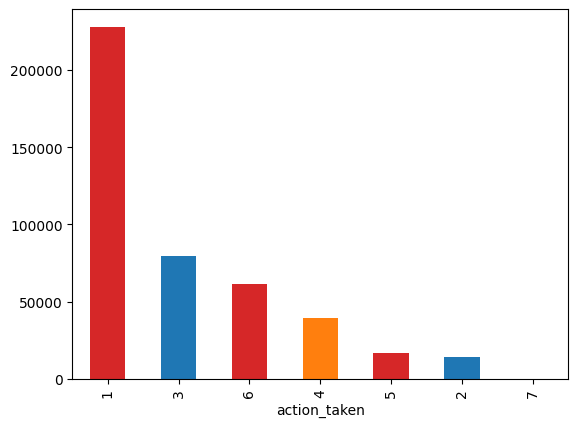

In [16]:
# bar plot to visualize the frequency
train['action_taken'].value_counts().plot.bar(color=bar_colors)

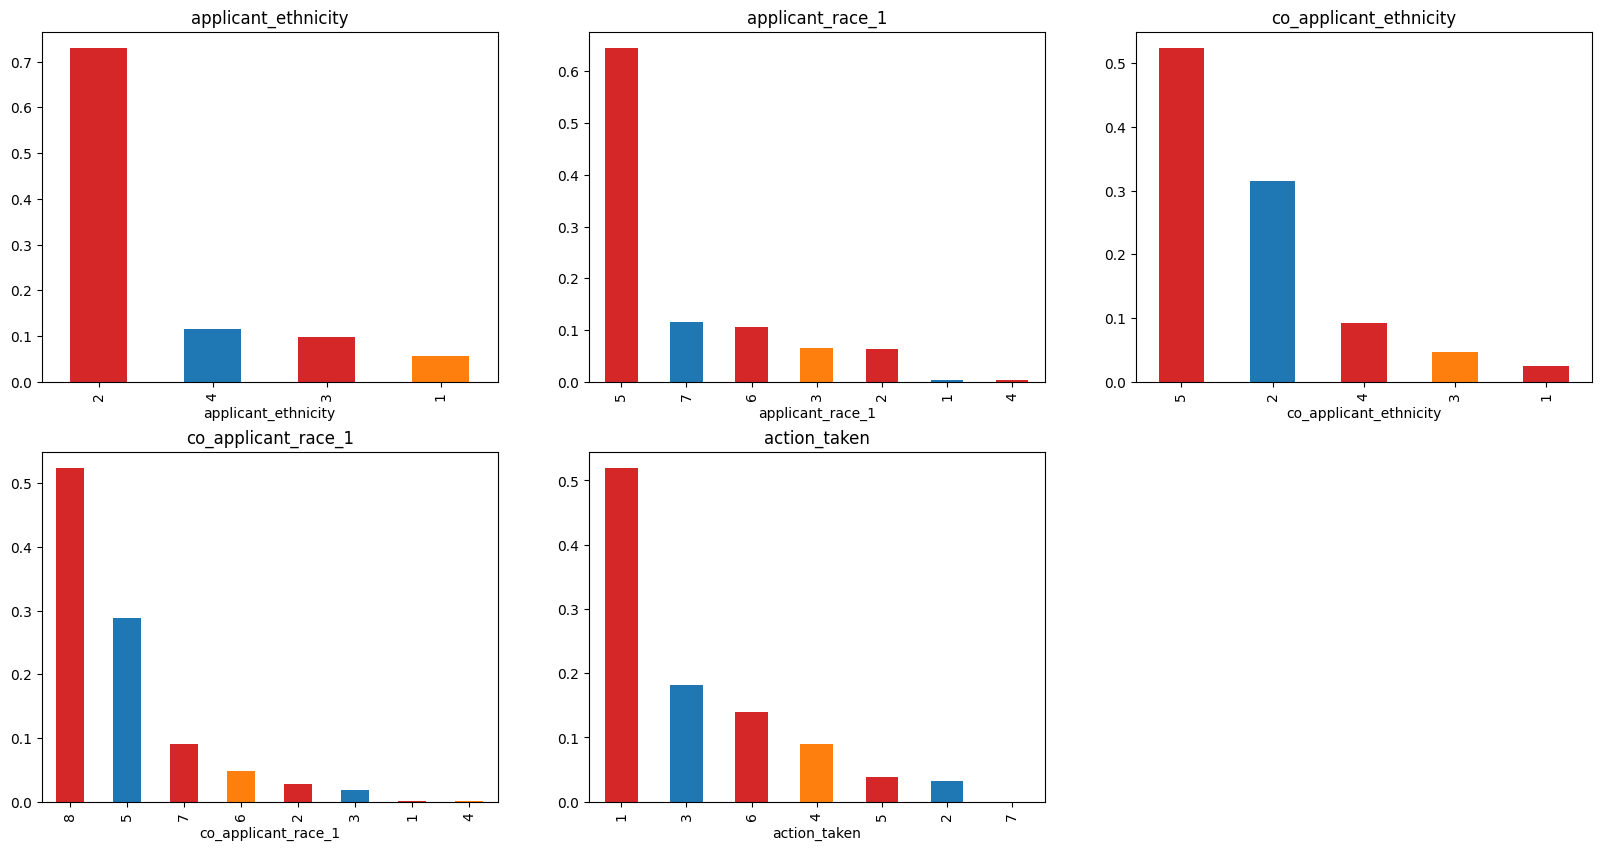

In [17]:
# Visualizing categorical features
# plt.figure(1)
plt.subplot(231)
train['applicant_ethnicity'].value_counts(normalize=True).plot.bar(
    figsize=(20, 10), title='applicant_ethnicity', color=bar_colors)

plt.subplot(232)
train['applicant_race_1'].value_counts(
    normalize=True).plot.bar(title='applicant_race_1', color=bar_colors)

plt.subplot(233)
train['co_applicant_ethnicity'].value_counts(
    normalize=True).plot.bar(title='co_applicant_ethnicity', color=bar_colors)

plt.subplot(234)
train['co_applicant_race_1'].value_counts(normalize=True).plot.bar(
    title='co_applicant_race_1', color=bar_colors)

plt.subplot(235)
train['action_taken'].value_counts(normalize=True).plot.bar(
    title='action_taken', color=bar_colors)

plt.show()

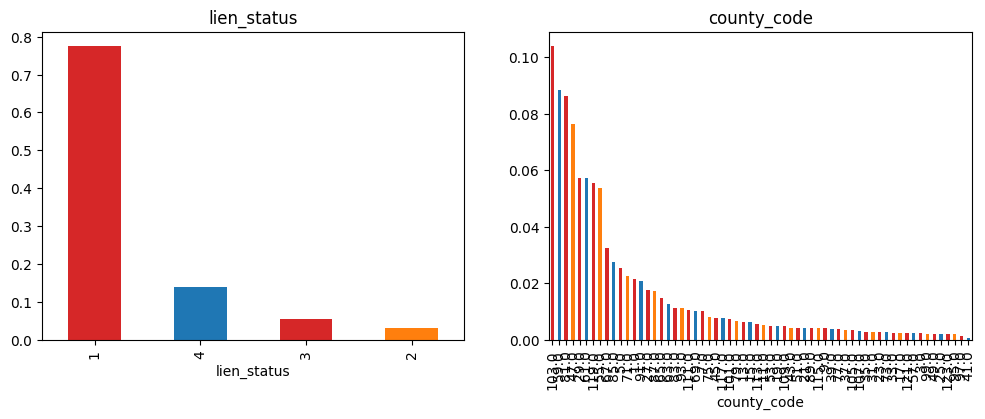

In [19]:
# Visualizing remaining categorical features
# plt.figure(1)
plt.subplot(121)
train['lien_status'].value_counts(normalize=True).plot.bar(
    figsize=(12, 4), title='lien_status', color=bar_colors)

plt.subplot(122)
train['county_code'].value_counts(normalize=True).plot.bar(
    title='county_code', color=bar_colors)

plt.show()

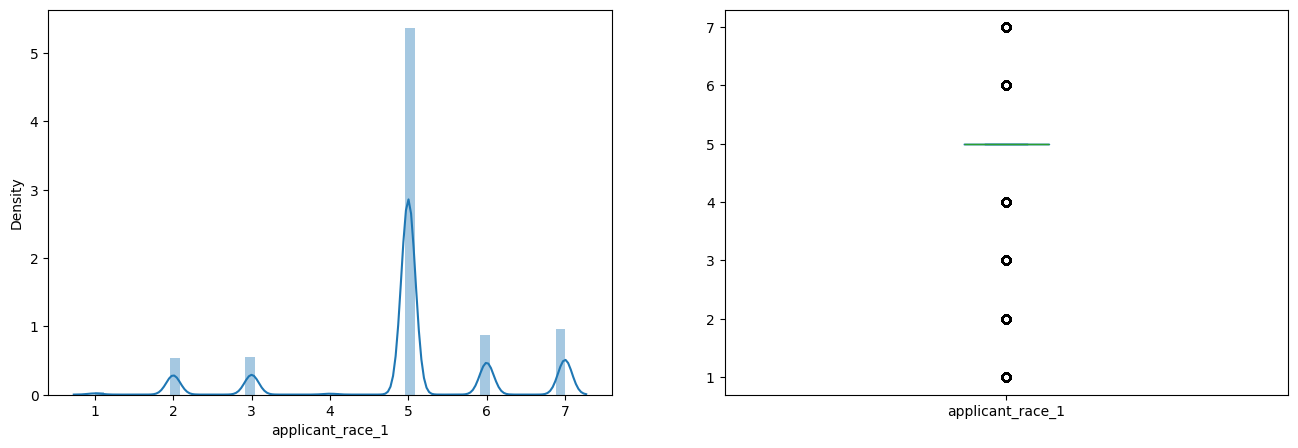

In [20]:
# Visualizing ApplicantIncome
# plt.figure(1)
plt.subplot(121)
sns.distplot(train['applicant_race_1'])

plt.subplot(122)
train['applicant_race_1'].plot.box(figsize=(16, 5))

plt.show()

Text(0.5, 0.98, '')

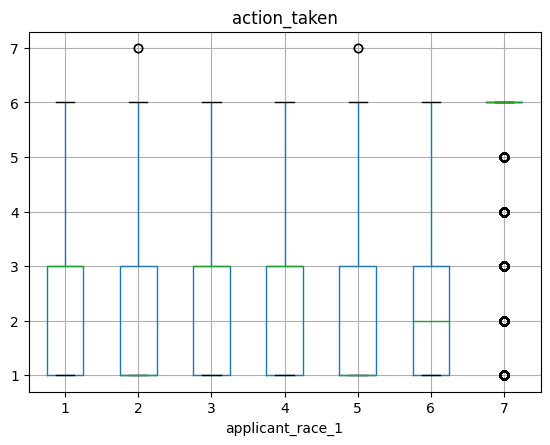

In [21]:
train.boxplot(column='action_taken', by='applicant_race_1')
plt.suptitle("")

Text(0.5, 0.98, '')

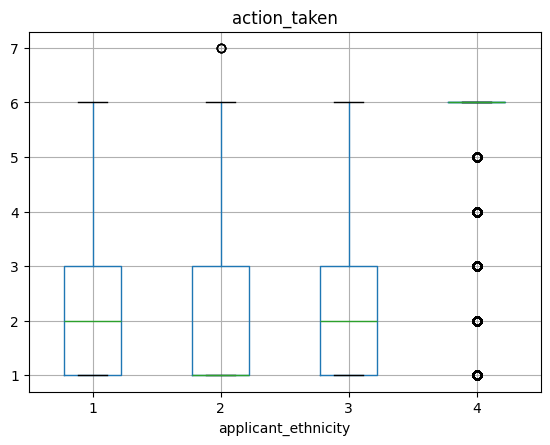

In [22]:
train.boxplot(column='action_taken', by = 'applicant_ethnicity')
plt.suptitle("")

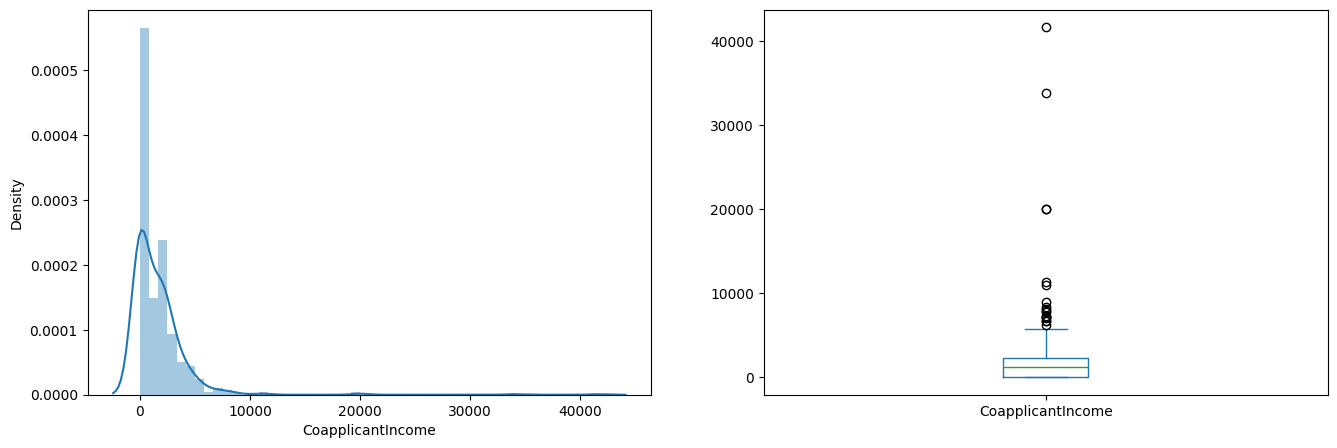

In [ ]:
# plt.figure(1)
plt.subplot(121)
sns.distplot(train['CoapplicantIncome']);

plt.subplot(122)
train['CoapplicantIncome'].plot.box(figsize=(16,5))

plt.show()

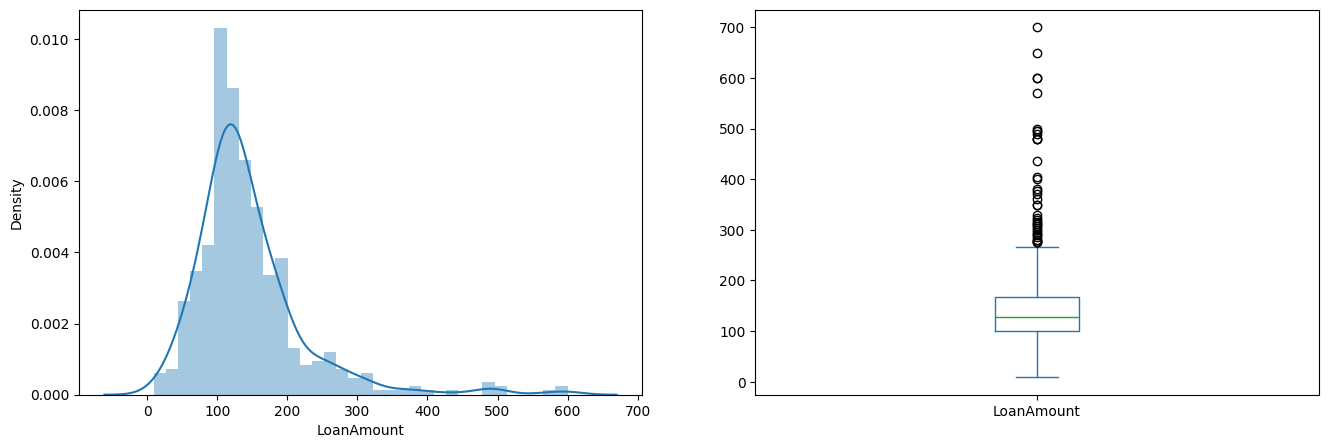

In [ ]:
# plt.figure(1)
plt.subplot(121)
df=train.dropna()
sns.distplot(df['LoanAmount']);

plt.subplot(122)
train['LoanAmount'].plot.box(figsize=(16,5))

plt.show()

In [ ]:
# frequency table of a variable will give us the count of each category in that variable
train['Loan_Amount_Term'].value_counts()

Loan_Amount_Term
360.0    512
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: count, dtype: int64

<Axes: title={'center': 'Loan_Amount_Term'}, xlabel='Loan_Amount_Term'>

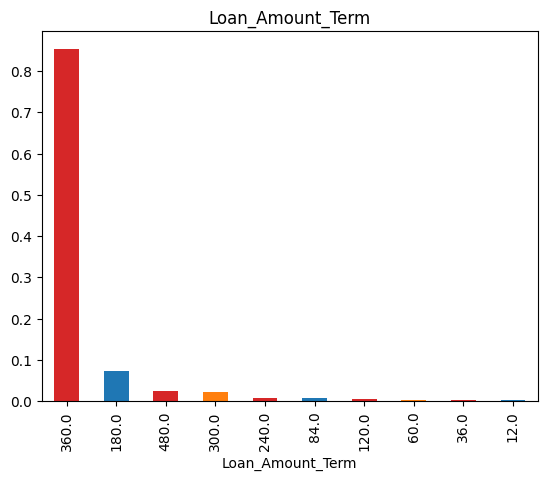

In [ ]:
# plot bar chart
train['Loan_Amount_Term'].value_counts(normalize=True).plot.bar(title= 'Loan_Amount_Term', color=bar_colors)

applicant_race_1    1      2      3    4       5      6      7
action_taken                                                  
1                 670  15868  12349  588  170948  21978   5653
2                  56   1125   1136   29    9927   1603    304
3                 659   5403   8500  379   51204  12669    883
4                 173   3029   3217  139   26551   5816    571
5                 106   1336   1610   66   10068   3448     99
6                  48   1127   1875   59   14635    765  42981
7                   0      2      0    0       2      0      0


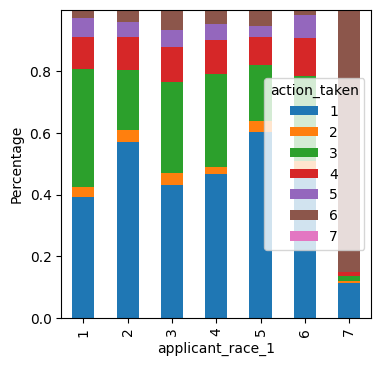

In [23]:
print(pd.crosstab(train['action_taken'],train['applicant_race_1']))

Gender = pd.crosstab(train['applicant_race_1'], train['action_taken'])
Gender.div(Gender.sum(1).astype(float), axis = 0).plot(kind="bar", stacked=True, figsize=(4,4))
plt.xlabel('applicant_race_1')
p = plt.ylabel('Percentage')

Loan_Status    N    Y
Married              
No            79  134
Yes          113  285


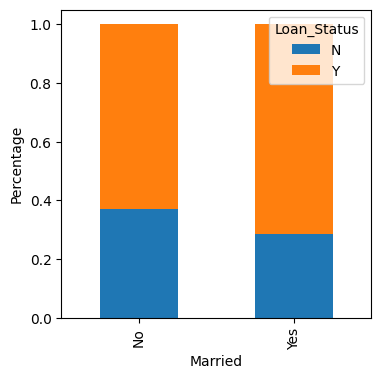

In [ ]:
print(pd.crosstab(train['Married'],train['Loan_Status']))

Married = pd.crosstab(train['Married'],train['Loan_Status'])
Married.div(Married.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))
plt.xlabel('Married')
p = plt.ylabel('Percentage')

Loan_Status    N    Y
Dependents           
0            107  238
1             36   66
2             25   76
3+            18   33


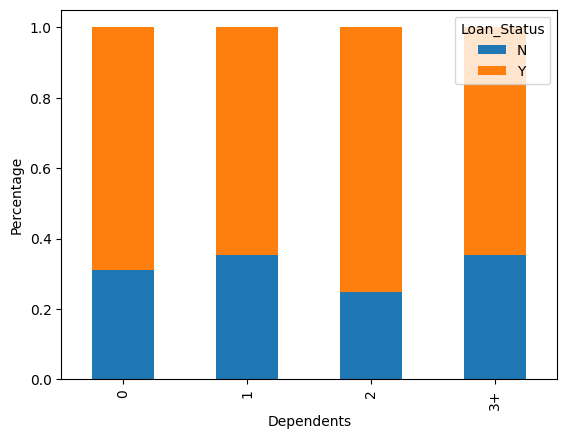

In [ ]:
print(pd.crosstab(train['Dependents'],train['Loan_Status']))

Dependents=pd.crosstab(train['Dependents'],train['Loan_Status'])
Dependents.div(Dependents.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.xlabel('Dependents')
p = plt.ylabel('Percentage')

Loan_Status     N    Y
Education             
Graduate      140  340
Not Graduate   52   82


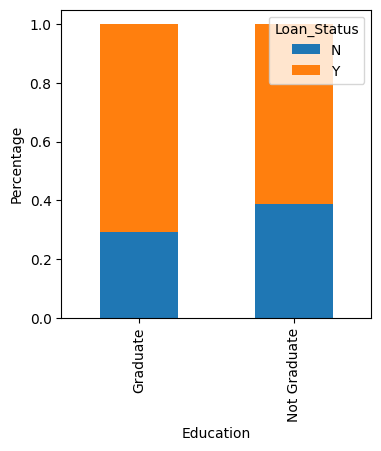

In [ ]:
print(pd.crosstab(train['Education'],train['Loan_Status']))

Education=pd.crosstab(train['Education'],train['Loan_Status'])
Education.div(Education.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))
plt.xlabel('Education')
p = plt.ylabel('Percentage')

Loan_Status      N    Y
Self_Employed          
No             157  343
Yes             26   56


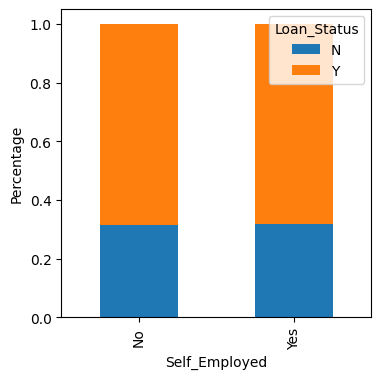

In [ ]:
print(pd.crosstab(train['Self_Employed'],train['Loan_Status']))

Self_Employed=pd.crosstab(train['Self_Employed'],train['Loan_Status'])
Self_Employed.div(Self_Employed.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))
plt.xlabel('Self_Employed')
p = plt.ylabel('Percentage')

Loan_Status      N    Y
Credit_History         
0.0             82    7
1.0             97  378


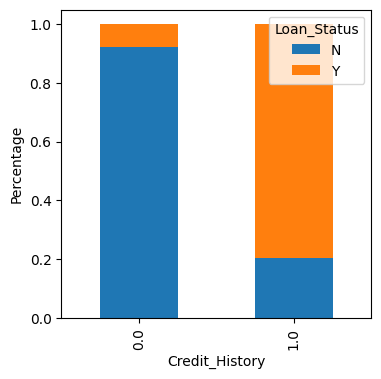

In [ ]:
print(pd.crosstab(train['Credit_History'],train['Loan_Status']))

Credit_History=pd.crosstab(train['Credit_History'],train['Loan_Status'])
Credit_History.div(Credit_History.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))
plt.xlabel('Credit_History')
p = plt.ylabel('Percentage')